In [0]:
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # used to create png image files

In [2]:
from google.colab import drive
drive.mount('/content/drive')
wine_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/winequality-red.csv", sep=';')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## **V.2 PERCEPTRON**

a) b)

Implement a perceptron that:

• Has randomly initialized weights and bias

• Uses the Rosenblatt perceptron learning rule (with changeable learning rate) 

• Utilizes the heaviside step activation function (discrete version)

Hopefully you’ve realized that your particular perceptron will only return ‘0’ or ‘1’ values.  

You’ll need to either modify or add a column to your red wine data.

You’ll need to implement a function to train your perceptron.

 Your training function should take in your red wine data as a parameter and should:


• Have a way to specify number of training epochs

• Train your perceptron until it makes no errors, if training epochs is set to 0, • Have a way to specify learning rate.

• Return a list of python tuples containing (performance):

[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . ]


For now, focus on training your perceptron on 2 chemical factors (for example, alcohol and pH) and only use wines with a score of 8 or higher and wines with a score of 3 or lower.

In [0]:
good_threshold = 8
bad_threshold = 3
# ONLY SELECT WINES THAT MEET THE THRESHOLDS
selected_wine_data = wine_data[(wine_data['quality'] >= good_threshold) | (wine_data['quality'] <= bad_threshold)]
# ADD A COLUMN Y FOR BINARY CLASSIFICATION
selected_wine_data = selected_wine_data.assign(y = pd.Series(selected_wine_data['quality'] >= good_threshold))

X = selected_wine_data.loc[:, ['alcohol', 'pH']]
X = X.reset_index(drop=True)
X.insert(0, 'x0', 1) # add a column of 1s in the first column
y = selected_wine_data.loc[:, ['y']]
y = y.reset_index(drop=True)

In [0]:
# can multiply matrices
# same as np.dot(a.transpose(), b)
# a is implicitly transposed during the calculation
def ft_dot(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]   
    return result

In [0]:
class Perceptron:
    def __init__(self, lr):
        self.W = None
        self.lr = lr
        self.stats = list()

    def predict(self, X):
        return 1 if (ft_dot(self.W, X) >= 0.0) else 0
    
    def _train_epoch(self, X, y, epoch, verbose):
        epoch_errors = 0
        for xi, yi in zip(X, y):
            tmp = self.lr * (yi - self.predict(xi))
            self.W += tmp * xi
            epoch_errors += int(tmp != 0.0)
        if verbose and epoch % 10 == 0:
            print('Epoch {}: {} errors'.format(epoch, epoch_errors))
        self.stats.append((epoch, epoch_errors, self.W))
        return epoch_errors
    
    def train(self, X, y, epochs, verbose=False, seed=None):
        if seed:
            random.seed(seed)
        if self.W is None:
            self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1])]
        epoch = 0
        while True:
            epoch_errors = self._train_epoch(X, y, epoch, verbose)
            epoch += 1
            if epochs != 0 and epoch == epochs:
                break
            elif epochs == 0 and epoch_errors == 0: # train until no errors
                break        
        return self.stats

In [0]:
p = Perceptron(lr=1.0)
stats = p.train(X.values, y.values, 0, verbose=False, seed=42)

V.2
c)

Write a function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure:

• The first plot should plot the number of errors your perceptron made as a function of epoch.

• The second plot should plot the decision boundary of your perceptron and also show ‘good’ and ‘bad’ wine data points on the final training epoch. This second plot should also shade ‘good’ and ‘bad’ areas!

• Your function should allow the user to specify a specific epoch and see what the decision boundary of the perceptron was on that epoch. If a negative epoch is given, cause the plots to show the last epoch.



In [0]:
def plot_errors(ax, stats, epoch):
  epochs = [t[0] for t in stats[:epoch + 1]]
  epoch_errors = [t[1] for t in stats[:epoch + 1]]
  ax.plot(epochs, epoch_errors)
  ax.set_title('Errors as a function of epochs')
  ax.set_xlabel('epoch')
  ax.set_ylabel('classification errors')

def plot_decision_boundary(ax, stats, epoch, X, y, features, good_thresh, bad_thresh):

  #select_wine_data = wine_data[(wine_data['quality'] >= good_thresh) | (wine_data['quality'] <= bad_thresh)]
  #select_wine_data = select_wine_data.assign(y = pd.Series(select_wine_data['quality'] >= good_thresh))

  x_min = X.loc[:, features[0]].min() - .2
  x_max = X.loc[:, features[0]].max() + .2
  y_min = X.loc[:, features[1]].min() - .2
  y_max = X.loc[:, features[1]].max() + .2

  ax.set_title('Decision Boundary on epoch:  {}'.format(epoch))
  ax.set_xlabel(features[0])
  ax.set_ylabel(features[1])
  ax.set_xlim([x_min, x_max])
  ax.set_ylim([y_min, y_max])

  w0, w1, w2 = stats[epoch][2]
  slope = -w1/w2
  intercept = -w0/w2

  # +2 is used to help shade the entire region
  x_coords = [x_min + (x_max + 2 - x_min) * i/10 for i in range(10)]
  y_coords = [intercept + slope * i for i in x_coords]

  ax.plot(x_coords, y_coords, 'b--', label='Decision Boundary')
  ax.fill_between(x_coords, y_coords, y_min - 2, color='#99ff99', alpha=.5)
  ax.fill_between(x_coords, y_coords, y_max + 2, color='#ff9999', alpha=.5)

  good_wines = X[y['y'] == True]
  ax.scatter(good_wines[features[0]], good_wines[features[1]], c=['g'], edgecolor='black', linewidth=2, alpha=0.65, label='good wines %d'%(good_thresh))
  bad_wines = X[y['y'] == False]
  ax.scatter(bad_wines[features[0]], bad_wines[features[1]], c=['r'], edgecolor='black', linewidth=2, alpha=0.65, label='bad wines %d'%(bad_thresh))
  ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

def plot_stats(stats, X, y, features, good_thresh, bad_thresh, epoch=-1):
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
  if epoch > len(stats) - 1:
    raise ValueError('Number of epochs should be less than {}'.format(len(stats)))
  if epoch == -1:
    epoch = len(stats) - 1
  plot_errors(ax[0], stats, epoch)
  plot_decision_boundary(ax[1], stats, epoch, X, y, features, good_thresh, bad_thresh)
  return fig

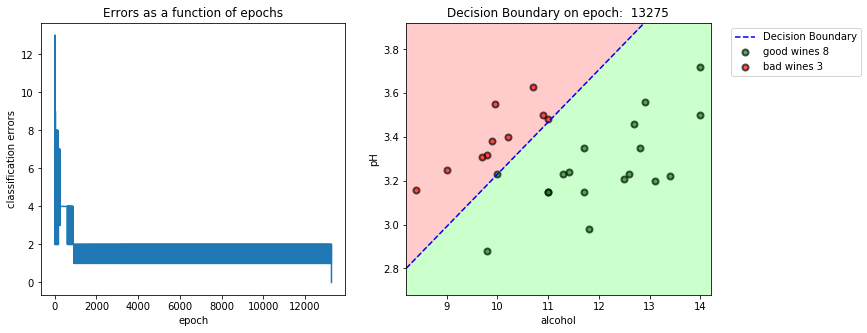

In [8]:
good_threshold = 8
bad_threshold = 3
features = ['alcohol', 'pH']
fig = plot_stats(stats, X, y, features, good_threshold, bad_threshold, -1)
plt.show(fig)

V.2
d)

Your perceptron appears to work...but why is it taking so many epochs to train? 

Maybe you can modify the red wine data to help the perceptron learn more quickly? 

Use the function you just created in part c) to plot and verify that your perceptron is learning more efficiently!


## Feature Scaling:

We standardize the data, to help expedite the training process.

x* = (x - mean(x)) / (max(x) - min(x))



In [0]:
# USING FEATURE SCALING TO EXPEDITE THE TRAINING

# https://www.jeremyjordan.me/batch-normalization/
def feature_scaling(series):
  return (series - series.mean()) / (series.max() - series.min())

In [0]:
good_threshold = 8
bad_threshold = 3
selected_wine_data = wine_data[(wine_data['quality'] >= good_threshold) | (wine_data['quality'] <= bad_threshold)]
selected_wine_data = selected_wine_data.assign(y = pd.Series(selected_wine_data['quality'] >= good_threshold))

# feature scaling, applied only to X inputs, not to y targets !
selected_wine_data['pH'] = feature_scaling(selected_wine_data['pH'])
selected_wine_data['alcohol'] = feature_scaling(selected_wine_data['alcohol'])

X = selected_wine_data.loc[:, ['alcohol', 'pH']]
X = X.reset_index(drop=True)
X.insert(0, 'x0', 1)
y = selected_wine_data.loc[:, ['y']]
y = y.reset_index(drop=True)

In [0]:
p = Perceptron(lr=1.0)
stats_normalized = p.train(X.values, y.values, 0, verbose=False, seed=42)

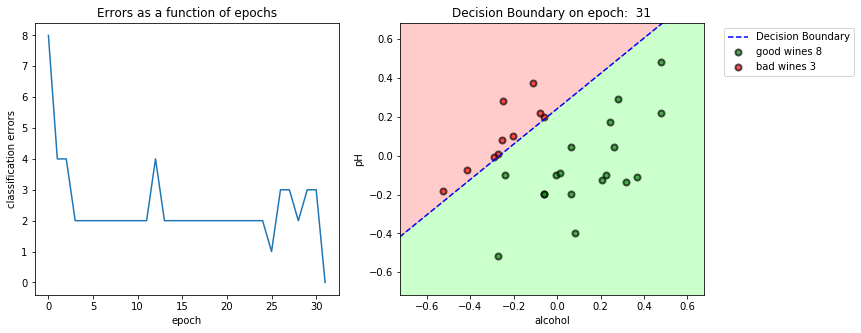

In [12]:
good_threshold = 8
bad_threshold = 3
features = ['alcohol', 'pH']
fig = plot_stats(stats_normalized, X, y, features, good_threshold, bad_threshold, -1)
plt.show(fig)